<a href="https://colab.research.google.com/github/svohra10/Project-2-Coding-Dojo/blob/main/Project_2_Technical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# Imports
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Set 2 

1.   Kaggel
2.   housing data to predict final price of each home based on 79 variables



3) What is the target?
Final house price  

In [65]:
df = pd.read_csv('/content/drive/MyDrive/Part-time Data Science - Python Basics/hosue_ train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

4) Is this a classification or regression problem?
Regression 

5) How many features?

80

6) How many rows?
1460

7) A lot of missing data points and a lot of features to be comparing. 

In [67]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [68]:
# find duplicate values 
df.duplicated().any()

False

# Handling Missing Values 

In [69]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

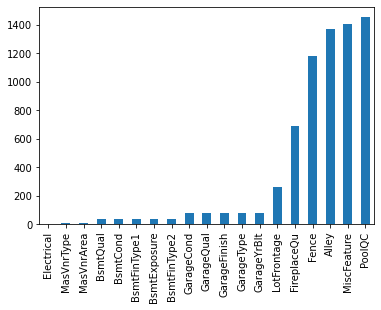

In [70]:
zero_values = df.isnull().sum()
zero_values = zero_values[zero_values > 0]
zero_values.sort_values(inplace = True)
zero_values.plot.bar()

Fill in data missing data means that the house is lacking the ammenitity and this is will have an effect on price.

In [71]:
df['PoolQC'] = df['PoolQC'].fillna('None')

In [72]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [73]:
df['Alley'] = df['Alley'].fillna('None')

In [74]:
df['Fence'] = df['Fence'].fillna('None')

In [75]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [76]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')  

In [77]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [78]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [79]:
df['BsmtQual'] = df['BsmtQual'].fillna('No')

In [80]:
df['BsmtCond'] = df['BsmtCond'].fillna('No')

In [81]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')

In [82]:
#assume basement exsposure is no
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')

In [83]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [84]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [85]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [86]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

Garage or basement being Na likely means there is not a garage or a basement in the house 

In [87]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [88]:
#confirm no more missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Mislabeled Catergories 

In [89]:
# Sub class should be a cat variable not a numerical 
df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})

In [90]:
df = df.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

# Correlation

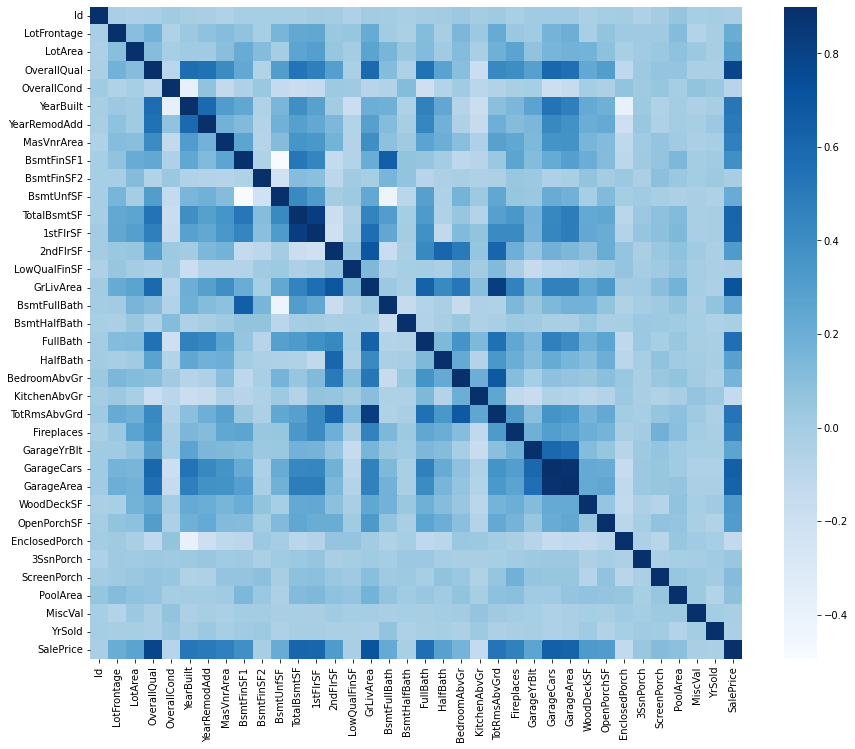

In [91]:
# Explore the relationships between variables with bivariate visuals
corr = df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [92]:
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


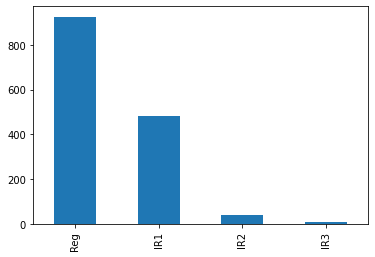

In [93]:
# Check univariate distributions and explore categorical variable(s)
df['LotShape'].value_counts().plot(kind = 'bar');

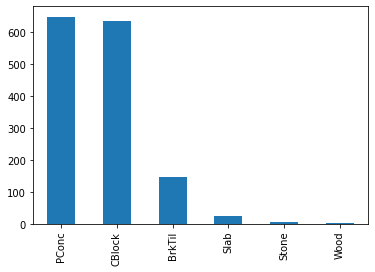

In [94]:
df['Foundation'].value_counts().plot(kind = 'bar');

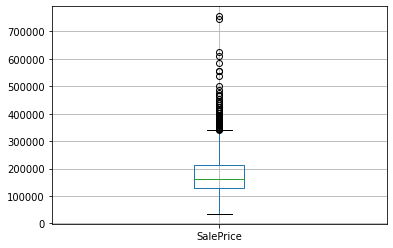

In [95]:
df.boxplot(column = 'SalePrice');

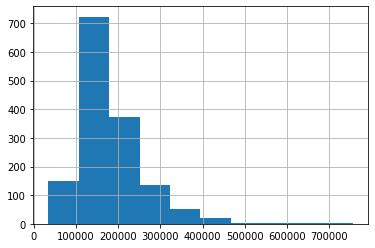

In [143]:
# Create box plot to visualize numerical variables 
df['SalePrice'].hist();

Large amount of outliers data is centralized <300,000

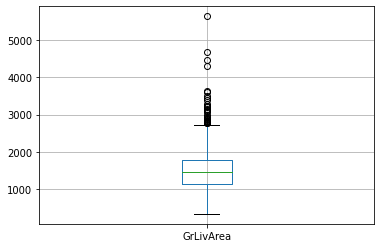

In [96]:
df.boxplot(column = 'GrLivArea');

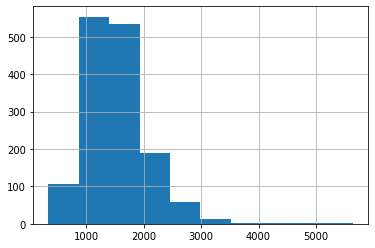

In [144]:
# Create box plot to visualize numerical variables 
df['GrLivArea'].hist();

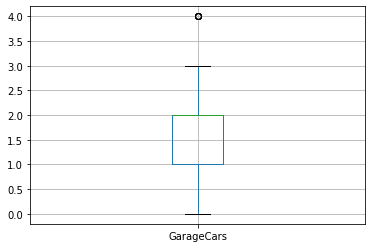

In [97]:
df.boxplot(column = 'GarageCars');

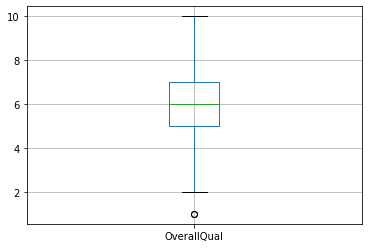

In [98]:
df.boxplot(column = 'OverallQual');

# Pre-processing 

Encode categorical features as ordered numbers

In [99]:
df['Alley'].replace({'None':0, 'Grvl':1, 'Pave' : 2}, inplace=True)
df['Alley'].value_counts()

0    1369
1      50
2      41
Name: Alley, dtype: int64

In [100]:
df['BsmtCond'].replace({'No':0, 'Po': 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace=True)
df['BsmtCond'].value_counts()

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [101]:
df['BsmtFinType1'].replace({'None':0, 'Unf': 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}, inplace=True)
df['BsmtFinType1'].value_counts()

1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [102]:
df['BsmtExposure'].replace({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3}, inplace=True)
df['BsmtExposure'].value_counts()

0    991
2    221
3    134
1    114
Name: BsmtExposure, dtype: int64

In [103]:
df['BsmtFinType2'].replace({'None':0, 'Unf': 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}, inplace=True)
df['BsmtFinType2'].value_counts()

1    1256
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

In [104]:
df['BsmtQual'].replace({'No':0, 'Po': 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace=True)
df['BsmtQual'].value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

In [105]:
df['ExterCond'].replace({'No':0, 'Po': 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace=True)
df['ExterCond'].value_counts()

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

In [106]:
df['ExterQual'].replace({'No':0, 'Po': 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace=True)
df['ExterQual'].value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [107]:
df['FireplaceQu'].replace({'None':0, 'Po': 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace=True)
df['FireplaceQu'].value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [108]:
df['FireplaceQu'].replace({'Sal' : 1, 'Sev' : 2,'Maj2' : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8 }, inplace=True)
df['FireplaceQu'].value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [109]:
df['GarageCond'].replace({'None':0, 'Po': 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace=True)
df['GarageCond'].value_counts()

3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64

In [110]:
df['GarageQual'].replace({'None':0, 'Po': 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace=True)
df['GarageQual'].value_counts()

3    1311
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

In [111]:
df['HeatingQC'].replace({'None':0, 'Po': 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace=True)
df['HeatingQC'].value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

In [112]:
df['KitchenQual'].replace({'None':0, 'Po': 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace=True)
df['KitchenQual'].value_counts()

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

In [113]:
df['LandSlope'].replace({'Sev': 1, 'Mod' : 2, 'Gtl' : 3}, inplace=True)
df['LandSlope'].value_counts()

3    1382
2      65
1      13
Name: LandSlope, dtype: int64

In [114]:
df['LotShape'].replace({"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}, inplace=True)
df['LotShape'].value_counts()

4    925
3    484
2     41
1     10
Name: LotShape, dtype: int64

In [115]:
df['PavedDrive'].replace({"N" : 1, "P" : 2, "Y" : 3}, inplace=True)
df['PavedDrive'].value_counts()

3    1340
1      90
2      30
Name: PavedDrive, dtype: int64

In [116]:
df['PoolQC'].replace({'None':0, 'Fa': 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace=True)
df['PoolQC'].value_counts()

0    1453
3       3
4       2
1       2
Name: PoolQC, dtype: int64

In [117]:
df['Street'].replace({'Grvl':1, 'Pave': 2,}, inplace=True)
df['Street'].value_counts()

2    1454
1       6
Name: Street, dtype: int64

In [118]:
df['Utilities'].replace({'ELO': 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4}, inplace=True)
df['Utilities'].value_counts()

4    1459
2       1
Name: Utilities, dtype: int64

In [119]:
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.361863
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
GarageYrBlt      0.261366
PavedDrive       0.231357
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
LotFrontage      0.209624
BedroomAbvGr     0.168213
PoolQC           0.115484
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch   

In [120]:
df = df.drop(columns = 'Id')

In [121]:
# Identify target vector and features matrix
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

In [122]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [123]:
# instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [124]:
#instantiate the standard scaler, OneHotEncoder and Imputers
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [126]:
# Setup the pipelines for the numeric and categorical data
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

In [127]:
# Setup the tuples to pair the processors with the make column selecotrs
num_tuple = (num_processor, num_selector)
cat_tuple = (cat_processor, cat_selector)

In [128]:
# Instantiate the make column transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [129]:
# Instantiate the KNN model
knn = KNeighborsRegressor()

# Make the pipeline
knn_pipe = make_pipeline(col_transformer, knn)

# Fit on training data only
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efc08149090>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                   

In [130]:
knn_predict = knn_pipe.predict(X_test)
knn_predict

array([141570. , 287850. , 109380. , 137740. , 324165.2, 100300. ,
       166260. , 150000. , 101720. , 141400. , 128640. , 126290. ,
       134040. , 195900. , 174380. , 135630. , 185808. , 120080. ,
       117800. , 217600. , 152380. , 198430. , 210240. , 135660. ,
       209100. , 174728. , 185983. , 114880. , 178600. , 181300. ,
       124300. , 296950. , 160900. , 108780. , 247760. , 141100. ,
       134780. , 197478. , 249400. ,  94440. , 128900. , 231700. ,
       118380. , 276018. , 126400. , 131657.4, 124100. , 137390. ,
       391290.6, 128850. , 128180. , 183640. ,  99200. , 279965.2,
       139660. , 214600. , 209600. , 167960. , 133400. ,  99640. ,
        94900. , 144805. , 295202.6, 257774. , 261963.2, 179950. ,
       122580. , 312800. , 111620. , 171780. , 106963.4, 132700. ,
       121480. ,  96220. , 399978. , 193860. , 288350. , 293950. ,
       139640. , 119700. ,  97480. ,  70200. , 111500. , 101100. ,
       161700. , 127600. , 262146. , 213280. , 139660. , 17064

In [131]:
# Evaluation metrics 
print('KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_pipe.predict(X_train))))
print('KNN Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_pipe.predict(X_test))))
print('------')
print('KNN Training R2:', r2_score(y_train, knn_pipe.predict(X_train)))
print('KNN Testing R2:', r2_score(y_test, knn_pipe.predict(X_test)))


KNN Training RMSE: 31698.50795914908
KNN Testing RMSE: 36892.690472356386
------
KNN Training R2: 0.8345047373046353
KNN Testing R2: 0.8057086989139207


In [132]:
# tune the model 
knn_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efc08149090>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <skle

In [133]:
# Define the hyperparameters being tuned 
knn_params = {'kneighborsregressor__n_neighbors' : [5, 7, 9, 11],
              'kneighborsregressor__leaf_size' : [15, 20, 30]}

In [134]:
# Instantiate the Gridsearch with the KNN pipeline and the knn_params 
knn_gs = GridSearchCV(knn_pipe, knn_params)

knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7efc08149090>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [135]:
# See which hyperparameters gave the best results
knn_gs.best_params_

{'kneighborsregressor__leaf_size': 15, 'kneighborsregressor__n_neighbors': 9}

In [136]:
print('KNN_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_gs.predict(X_train))))
print('KNN_GS Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_gs.predict(X_test))))
print('------')
print('KNN_GS Training R2:', r2_score(y_train, knn_gs.predict(X_train)))
print('KNN_GS Testing R2:', r2_score(y_test, knn_gs.predict(X_test)))

KNN_GS Training RMSE: 34015.369509893855
KNN_GS Testing RMSE: 36519.11504008796
------
KNN_GS Training R2: 0.8094283423472031
KNN_GS Testing R2: 0.8096235650208998


In [137]:
# Run a default random forest model in the pipeline 
rf = RandomForestRegressor(random_state = 42)

# Make the pipeline and include the column_transformer
rf_pipe = make_pipeline(col_transformer, rf)
# Fit only on training data!
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efc08149090>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                   

In [138]:
# Obtain evaluation metrics on both train and test sets
print('RF Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_pipe.predict(X_train))))
print('RF Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_pipe.predict(X_test))))
print('------')
print('RF Training R2:', r2_score(y_train, rf_pipe.predict(X_train)))
print('RF Testing R2:', r2_score(y_test, rf_pipe.predict(X_test)))

RF Training RMSE: 11905.230834058148
RF Testing RMSE: 27490.124242224512
------
RF Training R2: 0.9766555542935128
RF Testing R2: 0.8921236843076064


In [139]:
# Now we will hypertune the random forest model.
rf_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efc08149090>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <skle

In [140]:
# Define the hyperparameters you want to test.
rf_params = {'randomforestregressor__max_depth' : [None, 5],
             'randomforestregressor__n_estimators' : [100, 300, 500],
             'randomforestregressor__min_samples_split' : [2, 4]}

In [141]:
# Instantiate the Gridsearch with the Random Forest pipeline
rf_gs = GridSearchCV(rf_pipe, rf_params)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7efc08149090>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [142]:
# Obtain the evaluation metrics of the tuned model for both the train and the test sets
print('RF_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_gs.predict(X_train))))
print('RF_GS Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_gs.predict(X_test))))
print('------')
print('RF_GS Training R2:', r2_score(y_train, rf_gs.predict(X_train)))
print('RF_GS Testing R2:', r2_score(y_test, rf_gs.predict(X_test)))

RF_GS Training RMSE: 11905.230834058148
RF_GS Testing RMSE: 27490.124242224512
------
RF_GS Training R2: 0.9766555542935128
RF_GS Testing R2: 0.8921236843076064


Based on the hypertuned results, the random tree model had better performance on both the test sets. It had a higher R2 score which demonstrates that it is explaing a higher amount of variance in the data. It also had a lower RMSE which means there was, on average, less error in the predictions with this model.  The hypertuned model had a max depth of 5, min sample split of 2 and 100 estimators.